# LGM-VIP DATASCIENCE INTERNSHIP 

## BEGINNER TASK 2- 
## STOCK MARKET PREDICTION AND FORECASTING USING STACKED LSTM

###  Done by Thiru Kumaran T R
### IDE- Jupyter Notebook

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow-io-gcs-filesystem>=0.21.0 in c:\users\thiru\anaconda3\lib\site-packages (from tensorflow) (0.23.1)



## IMPORTING LIBRARIES

In [3]:
import math
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
from sklearn.metrics import mean_squared_error


## LOADING DATASET

In [4]:
d =pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [5]:
d.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
d.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [7]:
d.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


In [8]:
d.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [9]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [10]:
d.shape

(2035, 8)

In [11]:
df = d.reset_index()['Close']

In [12]:
df

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

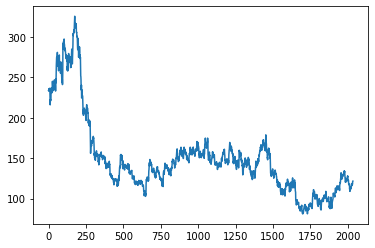

In [13]:
plt.plot(df)

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Last'}>,
        <AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Total Trade Quantity'}>],
       [<AxesSubplot:title={'center':'Turnover (Lacs)'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

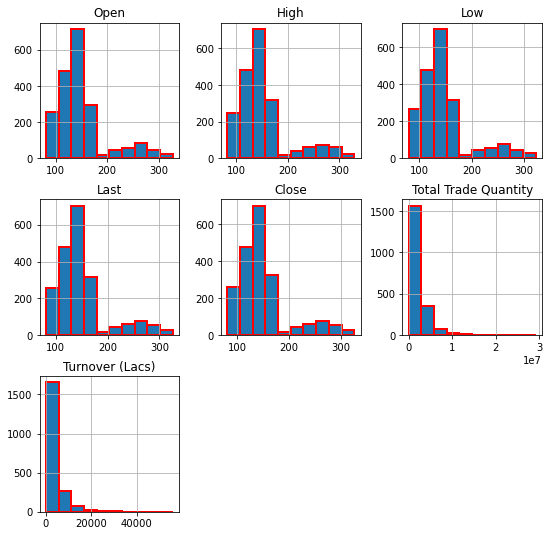

In [14]:
d.hist(edgecolor = 'red',linewidth = 2,figsize=(9,9))

## DATA SCALING 

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [16]:
df

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

## DATA SPLITTING

In [17]:
training_size = int(len(df)*0.80)
test_size=len(df) - training_size
train_data,test_data = df[0:training_size,:],df[training_size:len(df),:1]

In [18]:
training_size,test_size

(1628, 407)

In [19]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1435866 ],
       [0.13419118],
       [0.1431781 ]])

In [20]:
test_data

array([[0.16115196],
       [0.16176471],
       [0.17320261],
       [0.18218954],
       [0.16237745],
       [0.13112745],
       [0.15931373],
       [0.15951797],
       [0.14808007],
       [0.16278595],
       [0.15625   ],
       [0.16319444],
       [0.16360294],
       [0.16278595],
       [0.16544118],
       [0.15522876],
       [0.17197712],
       [0.1503268 ],
       [0.13255719],
       [0.14338235],
       [0.15849673],
       [0.1186683 ],
       [0.11519608],
       [0.10947712],
       [0.0692402 ],
       [0.06597222],
       [0.05841503],
       [0.05044935],
       [0.04534314],
       [0.04779412],
       [0.05290033],
       [0.04922386],
       [0.06638072],
       [0.07169118],
       [0.05392157],
       [0.04881536],
       [0.04881536],
       [0.05310458],
       [0.04963235],
       [0.05065359],
       [0.05126634],
       [0.04963235],
       [0.05902778],
       [0.05555556],
       [0.04084967],
       [0.03737745],
       [0.03737745],
       [0.026

In [21]:
def new_dataset(dataset, time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [22]:
time_step = 100
x_train, y_train = new_dataset(train_data,time_step)
x_test, y_test = new_dataset(test_data,time_step)

In [23]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

##  STACKED LSTM MODEL

In [ ]:
Stacked Long Short Term Memory technique refers which each layers corresponds to multiple memory cells.

In [24]:
m = Sequential()

In [25]:
m.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
m.add(LSTM(50, return_sequences = True)) 
m.add(LSTM(50))
m.add(Dense(1))
m.compile(loss = 'mean_squared_error', optimizer = 'adam')


In [26]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
m.fit(x_train, y_train, validation_data =(x_test,y_test),epochs = 20,batch_size = 64)

Epoch 1/20
24/24 [==============================] - 21s 380ms/step - loss: 0.0225 - val_loss: 0.0052
Epoch 2/20
24/24 [==============================] - 6s 261ms/step - loss: 0.0023 - val_loss: 5.5001e-04
Epoch 3/20
24/24 [==============================] - 6s 257ms/step - loss: 0.0014 - val_loss: 8.9668e-04
Epoch 4/20
24/24 [==============================] - 6s 260ms/step - loss: 0.0013 - val_loss: 6.6477e-04
Epoch 5/20
24/24 [==============================] - 6s 256ms/step - loss: 0.0012 - val_loss: 6.6269e-04
Epoch 6/20
24/24 [==============================] - 6s 258ms/step - loss: 0.0012 - val_loss: 5.5422e-04
Epoch 7/20
24/24 [==============================] - 6s 258ms/step - loss: 0.0011 - val_loss: 7.4135e-04
Epoch 8/20
24/24 [==============================] - 6s 255ms/step - loss: 0.0011 - val_loss: 6.8830e-04
Epoch 9/20
24/24 [==============================] - 6s 256ms/step - loss: 9.9425e-04 - val_loss: 4.8955e-04
Epoch 10/20
24/24 [==============================] - 6s 257ms/s

## DATA PLOTTING

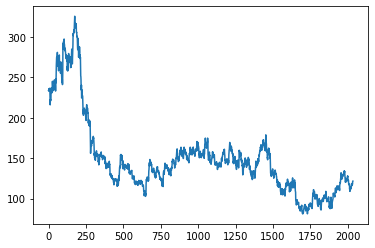

In [31]:
l = 100
train_predict=[]
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:,:]=np.nan
train_predict=trainPredictPlot[l:len(train_predict)+l,:] 
testPredictPlot =np.empty_like(df)
testPredictPlot[:,:]=np.nan
test_predict=testPredictPlot[l:len(train_predict)+(l*2)+1:len(df)-1,:] 
plt.plot(scaler.inverse_transform(df))


In [32]:
len(test_data)

407

In [33]:
x_input=test_data[341:].reshape(-1,1)
x_input.shape

(66, 1)

In [34]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [35]:
temp_input

[0.20200163398692816]

In [36]:
train_predict = m.predict(x_train)
test_predict = m.predict(x_test)

In [37]:
train_predict = scaler.inverse_transform(train_predict)

In [38]:
test_predict = scaler.inverse_transform(test_predict)

In [40]:
print("Train MSE: "+str(math.sqrt(mean_squared_error(y_train,train_predict))))


Train MSE: 158.3162317369107


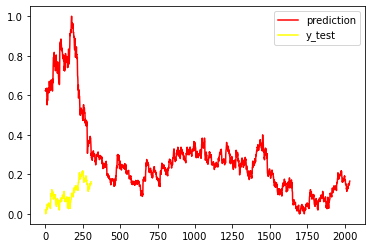

In [41]:
plt.plot(df,color='red', label='prediction')
plt.plot(y_test,color='yellow',label='y_test')
plt.legend(loc='upper right')
plt.show()